# Arithmetic Operations

(679, 800, 3)
(679, 800, 3)


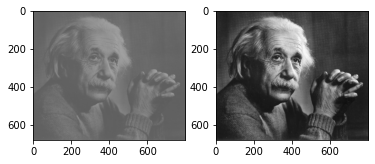

In [27]:
import cv2
import matplotlib.pyplot as plt

# reading images
image1 = cv2.imread('Images/einstein_lowContrast.tif')
image2 = cv2.imread('Images/einstein_highContrast.tif')

images = [image1, image2]

print(image1.shape)
print(image2.shape)

count = 2
for i in range(count):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[i])
plt.show()

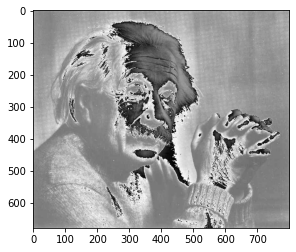

In [28]:
# adding images
added_images = image1 + image2
plt.imshow(added_images)

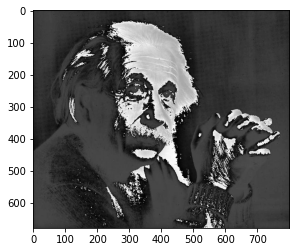

In [29]:
# subtracting images
subtracted_images = image1 - image2
plt.imshow(subtracted_images)

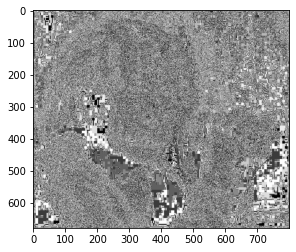

In [30]:
# multiplying images
multiplied_images = image1 * image2
plt.imshow(multiplied_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


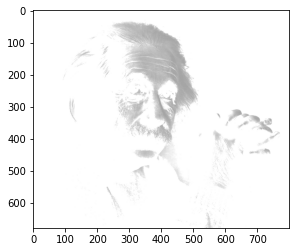

In [31]:
# multiplying images
divided_images = image1 / image2
plt.imshow(divided_images)

# Bitwise Operations

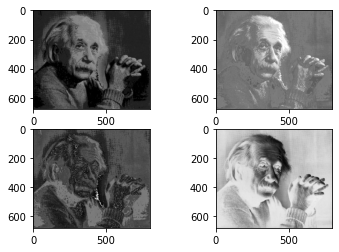

In [1]:
import cv2
import matplotlib.pyplot as plt

# importing images
image1 = cv2.imread('images/einstein_highContrast.tif')
image2 = cv2.imread('images/einstein_lowContrast.tif')

# bitwise AND
image_and = cv2.bitwise_and(image1, image2)

# bitwise OR
image_or = cv2.bitwise_or(image1, image2)

# bitwise XOR
image_xor = cv2.bitwise_xor(image1, image2)

# bitwise NOT
image_not = cv2.bitwise_not(image1, image2)

# results
images = [image_and, image_or, image_xor, image_not]
count = 4
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i])
plt.show()

# Interpolation

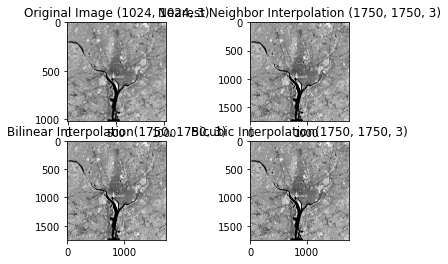

In [2]:
import cv2
import matplotlib.pyplot as plt

#input image
image = cv2.imread('images\map.tif')

# nearest neighbor interpolation
'''
Here, after resizing the image, we get a numpy array. To display the numpy array as an image, we
can either use the pillow library to convert it from array to image or we can save it in an image 
format like JPEG and then use the imshow() function in OpenCV. 

In case of plotting the images using the matplotlib library, there's no need to convert the numpy array
into Image.
'''
nearest_neighbor_interpolation = cv2.resize(image, (1750, 1750), interpolation = cv2.INTER_NEAREST)

# bilinear interpolation
bilinear_interpolation = cv2.resize(image, (1750,1750), interpolation = cv2.INTER_LINEAR)

# bicubic interpolation
bicubic_interpolation = cv2.resize(image, (1750,1750), interpolation = cv2.INTER_CUBIC)

# displaying all the images
images = [image, nearest_neighbor_interpolation, bilinear_interpolation, bicubic_interpolation]
title = [f"Original Image {image.shape}", f"Nearest Neighbor Interpolation {nearest_neighbor_interpolation.shape}", 
         f"Bilinear Interpolation{bilinear_interpolation.shape}", f"Bicubic Interpolation{bicubic_interpolation.shape}"]
count = 4

for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(title[i])
    plt.imshow(images[i])

plt.show()

# Affine Transformations

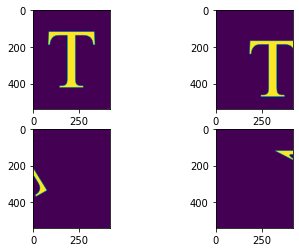

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

# reading the image
letterT = cv2.imread('images/letterT.tif')
letterT_gray = cv2.cvtColor(letterT, cv2.COLOR_BGR2GRAY)

# identity transform
letterT_A_identity = np.eye(3)
identity_transform = cv2.warpPerspective(letterT_gray, letterT_A_identity, (letterT_gray.shape[1], letterT_gray.shape[0]))

# Translation
letterT_A_translation = np.float32([[1, 0, 100], [0, 1, 50], [0, 0, 1]])
translation_transform = cv2.warpPerspective(letterT_gray, letterT_A_translation, (letterT_gray.shape[1], letterT_gray.shape[0]))

# Rotation
letterT_A_rotation = np.float32([[math.cos(45), -(math.sin(45)), 0], [math.sin(45), math.cos(24), 0], [0, 0, 1]])
rotation_transform = cv2.warpPerspective(letterT_gray, letterT_A_rotation, (letterT_gray.shape[1], letterT_gray.shape[0]))

# Shear
letterT_A_shear = np.float32([[1, 2, 0], [0, 1, 0], [0, 0, 1]])
shear_transform = cv2.warpPerspective(letterT_gray, letterT_A_shear, (letterT_gray.shape[1], letterT_gray.shape[0]))

# Results
images = [letterT_gray, translation_transform, rotation_transform, shear_transform]
count = 4
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i])
plt.show()

# Image Registration

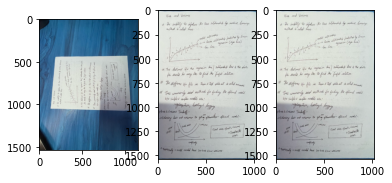

In [43]:
import cv2
import numpy as np

# reading input images
input_image_color = cv2.imread('images/imageRegistration_input.jpeg')
reference_image_color = cv2.imread('images/imageRegistration_reference.jpeg')

# converting color images to grayscale
input_image = cv2.cvtColor(input_image_color, cv2.COLOR_BGR2GRAY)
reference_image = cv2.cvtColor(reference_image_color, cv2.COLOR_BGR2GRAY)
height, width = reference_image.shape

# initiate ORB detector
orb = cv2.ORB_create(500)

# finding keypoints and detectors
keypoints_input_image, descriptor_1 = orb.detectAndCompute(input_image, None)
keypoints_reference_image, descriptor_2 = orb.detectAndCompute(reference_image, None)

# matching features between two images
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# matching the descriptors
matches = matcher.match(descriptor_1, descriptor_2)
no_of_matches = len(matches)

p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))
 
for i in range(len(matches)):
  p1[i, :] = keypoints_input_image[matches[i].queryIdx].pt
  p2[i, :] = keypoints_reference_image[matches[i].trainIdx].pt
    
# homography matrix
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)

# transforming colored image wrt to refernce image
transformed_image = cv2.warpPerspective(input_image_color,
                                       homography, (width, height))

# results
images = [input_image_color, reference_image_color, transformed_image]
count = 3
for i in range(count):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i])
plt.show()

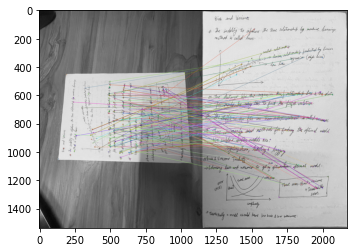

In [44]:
matchedVis = cv2.drawMatches(input_image, keypoints_input_image, reference_image, keypoints_reference_image, matches, None)
plt.imshow(matchedVis)